<a href="https://colab.research.google.com/github/srija-gudapati/Zomato_Insights_Analyzer/blob/main/Zomato_Inshight_analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Head:
                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  

Null values in the dataset:
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

Dataset Info:
<class 

<ipython-input-8-603597ea8ac7>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=zomato_df['listed_in(type)'], palette="viridis")


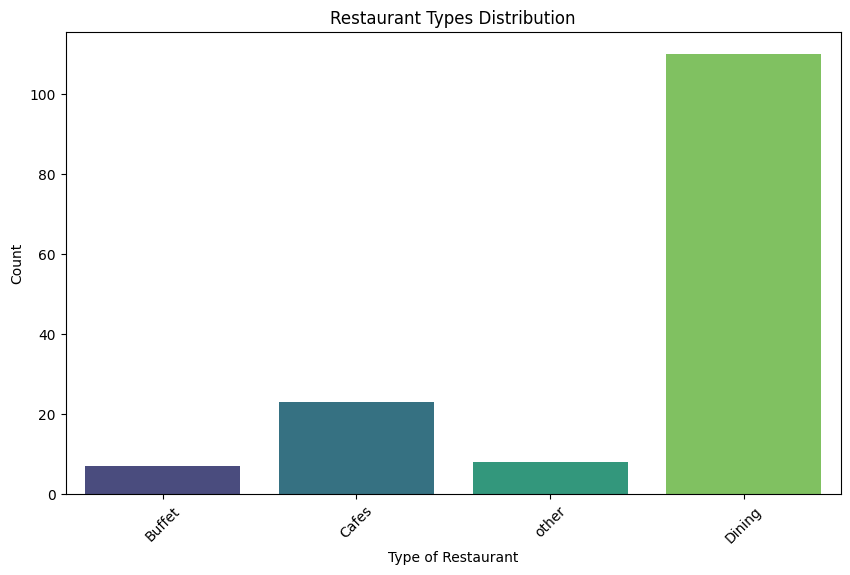

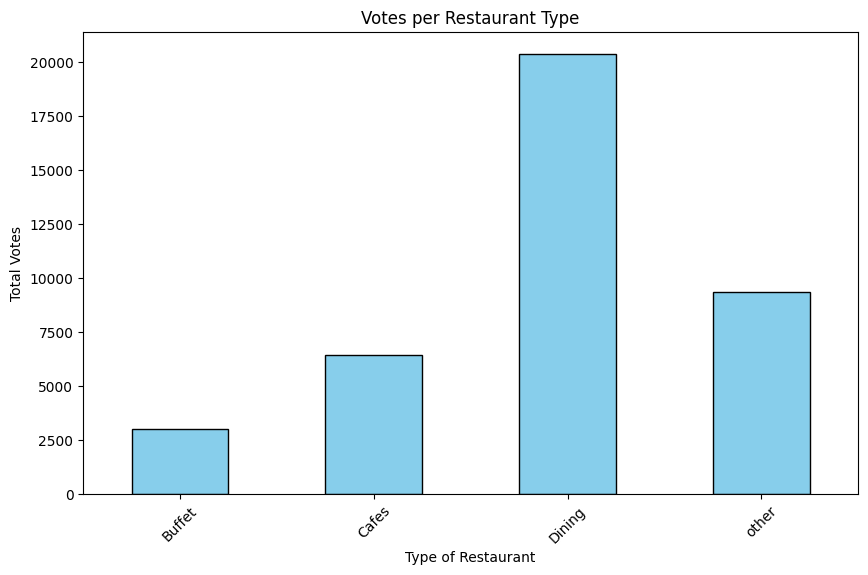

<ipython-input-8-603597ea8ac7>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=zomato_df['online_order'], palette="cool")


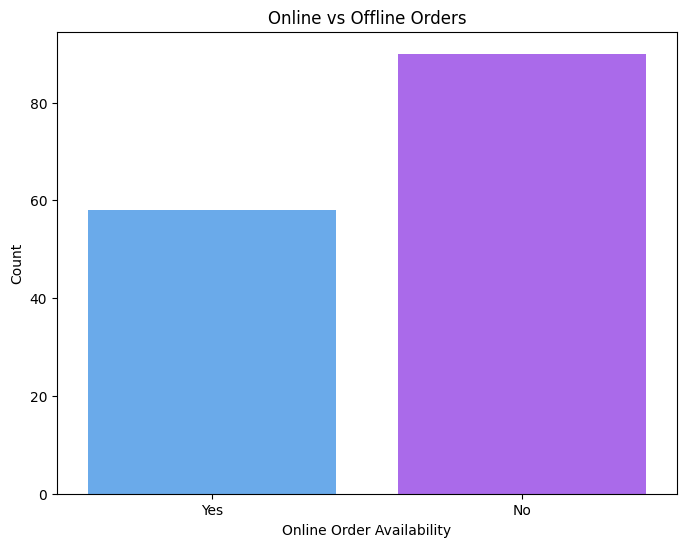

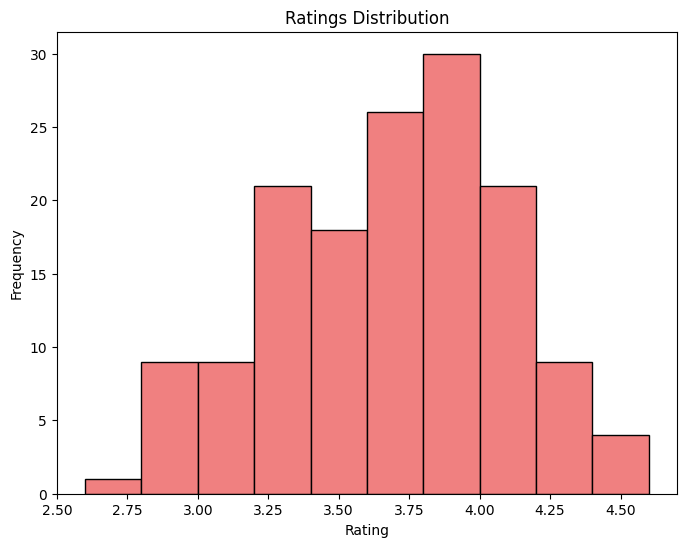

<ipython-input-8-603597ea8ac7>:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=zomato_df['approx_cost(for two people)'], palette="husl")


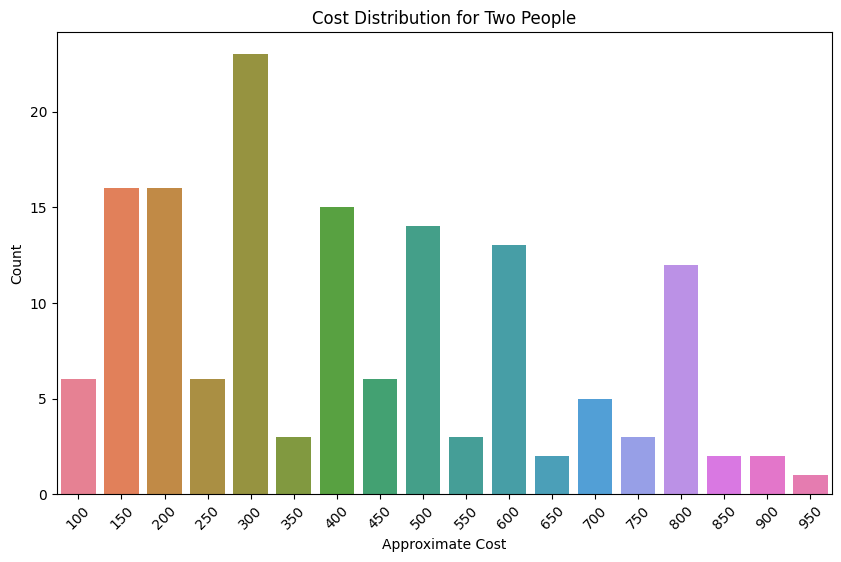

<ipython-input-8-603597ea8ac7>:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='online_order', y='rate', data=zomato_df, palette="pastel")


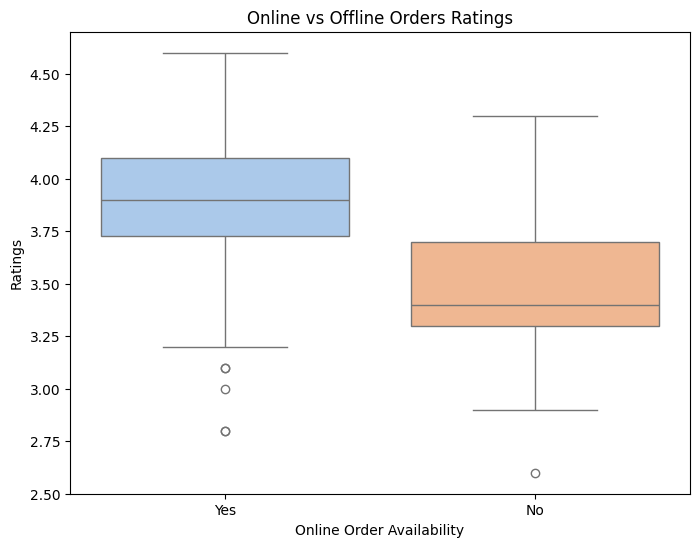


The restaurant with the highest votes is: Empire Restaurant with 4884 votes.

Cleaned dataset saved as 'cleaned_zomato_data.csv'.

Zomato Data Analysis Complete!


In [8]:
# Zomato Data Analysis Project

# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Step 1: Load the dataset
zomato_df = pd.read_csv("/Zomato_data.csv")

# Display first 5 rows of the dataset
print("Dataset Head:")
print(zomato_df.head())

# Step 3: Data Cleaning
# Handle missing or null values
print("\nNull values in the dataset:")
print(zomato_df.isnull().sum())

# Drop rows with missing values (if applicable)
zomato_df.dropna(inplace=True)

# Convert 'rate' column to numeric by removing '/5'
def handle_rate(value):
    try:
        return float(str(value).split('/')[0])
    except:
        return np.nan

zomato_df['rate'] = zomato_df['rate'].apply(handle_rate)

# Drop remaining rows with NaN rates
zomato_df.dropna(subset=['rate'], inplace=True)

# Step 4: Data Summary
print("\nDataset Info:")
print(zomato_df.info())

# Step 5: Exploratory Data Analysis
# 1. Distribution of restaurant types
plt.figure(figsize=(10, 6))
sns.countplot(x=zomato_df['listed_in(type)'], palette="viridis")
plt.title("Restaurant Types Distribution")
plt.xlabel("Type of Restaurant")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 2. Votes per restaurant type
votes_per_type = zomato_df.groupby('listed_in(type)')['votes'].sum()
plt.figure(figsize=(10, 6))
votes_per_type.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Votes per Restaurant Type")
plt.xlabel("Type of Restaurant")
plt.ylabel("Total Votes")
plt.xticks(rotation=45)
plt.show()

# 3. Restaurants offering online delivery
plt.figure(figsize=(8, 6))
sns.countplot(x=zomato_df['online_order'], palette="cool")
plt.title("Online vs Offline Orders")
plt.xlabel("Online Order Availability")
plt.ylabel("Count")
plt.show()

# 4. Ratings Distribution
plt.figure(figsize=(8, 6))
plt.hist(zomato_df['rate'], bins=10, color='lightcoral', edgecolor='black')
plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# 5. Approximate cost for couples
plt.figure(figsize=(10, 6))
sns.countplot(x=zomato_df['approx_cost(for two people)'], palette="husl")
plt.title("Cost Distribution for Two People")
plt.xlabel("Approximate Cost")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 6. Boxplot: Online vs Offline Orders Ratings
plt.figure(figsize=(8, 6))
sns.boxplot(x='online_order', y='rate', data=zomato_df, palette="pastel")
plt.title("Online vs Offline Orders Ratings")
plt.xlabel("Online Order Availability")
plt.ylabel("Ratings")
plt.show()

# Step 6: Insights
# Find the restaurant with maximum votes
max_votes = zomato_df['votes'].max()
top_restaurant = zomato_df.loc[zomato_df['votes'] == max_votes, 'name'].values[0]
print(f"\nThe restaurant with the highest votes is: {top_restaurant} with {max_votes} votes.")

# Step 7: Save Cleaned Dataset (Optional)
zomato_df.to_csv("cleaned_zomato_data.csv", index=False)
print("\nCleaned dataset saved as 'cleaned_zomato_data.csv'.")

# End of the analysis
print("\nZomato Data Analysis Complete!")
